> #### ***Submitted by: Malaika Ahmed***

# ***🔴 Task 31: Dimensionality Reduction Techniques***

Dimensionality reduction techniques simplify complex datasets, reduce computational costs, and help prevent overfitting in machine learning models. Common methods include Principal Component Analysis (PCA), which transforms data into principal components with the greatest variance; Linear Discriminant Analysis (LDA), which finds linear combinations of features that best separate classes; and t-Distributed Stochastic Neighbor Embedding (t-SNE), a non-linear technique for visualizing high-dimensional data. Other techniques include Independent Component Analysis (ICA) for separating a multivariate signal into independent components, and feature selection methods like SelectKBest and Recursive Feature Elimination (RFE). To see the impact of these techniques, pick a high-dimensional dataset and observe how the results of a model change when dimensionality reduction is applied. This will help you understand the effectiveness of each technique in improving model performance.



***

 # <span style='color:Red'>  ***What is dimensionality reduction*** </span>

- In statistics, machine learning, and information theory, dimensionality reduction or dimension reduction is the process of reduction of n-dimensions to a k-dimensions where k<<n.
- For N-D data we need N dimensions which we can no longer visualize it. So for visualization of any data having more than 3D, we will reduce it to 2 or 3 dimensions using technique called dimensionality reduction.
-  The objectives of dimensionality reduction are to visualize data easier, understand and analyze, and to improve the performance of ML models.


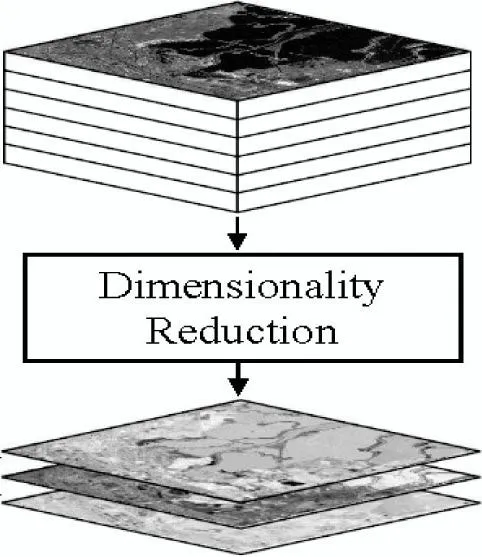

# ***Essence of Dimensionality Reduction:***

It’s not feasible to analyze each and every dimensions at a microscopic level in a high dimensional data. It might take us days or months to perform any meaningful analysis which requires lot of time, money and manpower in our business which is not often encouraged. Training a data with high dimensions will lead us problems like:

- Space required to store the data gets increased with increasing dimensions.
- Less dimensions will take low time complexity in training a model.
- As dimensions increases, the possibility of overfitting the model also gets increased.
- we cannot visualize a high dimensional data. By dimensionality reduction we will reduce the data to 2D or 3D for better visualization.
- It will remove all the correlated features in our data.


r data.

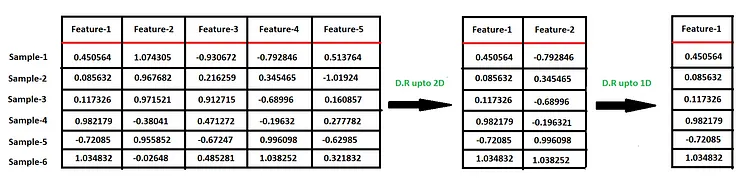

# ***Components of Dimensionality Reduction:***
There are two major components of dimensionality reductions are:






### 1. ***Feature Selection:***


Most of the times the features are not relevant to our problem. For example, we are training a model for predicting the heights of people and we have data with features( weights, color, moles, marital status, gender). We can see that the features like color, moles and marital status are not linked with the heights of people i.e., irrelevant to our problem of finding heights of people. Hence we need to come up with a solution of finding features which are most useful for our task.Feature selection involves in finding a subset of original data so that their will be minimum loss of information. It has following three strategies:

- Filter Strategy: Strategy to gain more information on the data.
- Wrapper Strategy: Basing on the model accuracy we will select features.
- Embedded Strategy: Basing on model prediction errors, we will take a decision whether to keep or remove the selected features.

### ***2.  Feature Projection***

Feature Projection also know as Feature Extraction is used to transform the data in high dimensional space to low dimensional space. The data transformation can be done in both linear and non linear.

For linear transformation we have ***principal component analysis(PCA)***, ***Linear Discriminant Analysis(LDA)*** and for non-linear transformations we apply ***T-SNE***.






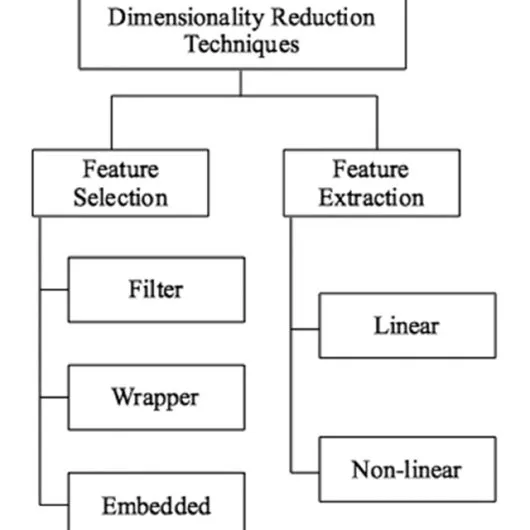

## ***When to Avoid Using Dimensionality Reduction?***
There are several situations where dimensionality reduction techniques are not recommended:

- If the dataset is small, the information loss caused by dimensionality reduction techniques may be large, and it may be better to use all the features.
- When the data is already well-structured and easy to understand, dimensionality reduction techniques may not be necessary, and it may be better to use all the features as the benefits from interpretability may outweigh gains such as ML performance.
- When the data has a non-linear structure, dimensionality reduction techniques such as PCA which only captures linear relationships in the data may not be effective, and other techniques such as t-SNE, UMAP are more appropriate.
- When the data is highly skewed, dimensionality reduction techniques such as PCA which assumes a normal distribution of the data may not be effective.

***

 # <span style='color:Red'>  ***Dimensionality Reduction Techniques for Numerical Features*** </span>


 # <span style='color:Blue'>  ***1. Principal Component Analysis*** </span>
- PCA is a dimension reduction method to transform a set of correlated variables into a set of uncorrelated variables named principal components, which are ordered by the amount of total variance in the data that they can explain.

- The first principal component explains the most variance in the data, the second principal component explains the second most variance and so on. By using only the first few principal components, which explain the most variance in the data, it is possible to reduce the dimensionality of the data while retaining most of the information.

sed.

### ***Pros of PCA***
- The major advantage of using PCA for dimensionality reduction is that it can help to remove redundant features, making the data easier to visualize and analyze.
- It can also help to eliminate noise and improve the performance of machine learning models.
- Additionally, it can help to identify patterns and relationships in the data that are not immediately obvious.

### ***Cons of PCA***

- PCA assumes that the data follows a Gaussian distribution, which might not be the case for some datasets.
- PCA reduces the dimensionality of the data by discarding some information, which may be important for some applications.
- PCA is sensitive to the scaling of the features, which means that the results may be affected by how the data is preprocessed.

### ***When to Use PCA***:

1. ***High-Dimensional Data***:
PCA is particularly useful when dealing with datasets with a large number of features to mitigate the curse of dimensionality.

2. ***Collinear Features***:
When features are highly correlated, PCA can be effective in capturing the shared information and representing it with fewer components.

3. ***Visualization:***
PCA is beneficial when visualizing high-dimensional data is challenging. It projects data into a lower-dimensional space that can be easily visualized.

4. ***Linear Relationships***:
When the relationships between variables are mostly linear, PCA is a suitable technique.

***

 # <span style='color:Blue'>  ***Implementing PCA*** </span>


## ***PRE-PROCESSING***

In [240]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

from sklearn.manifold import TSNE


In [212]:
df = pd.read_csv("winequalityN - winequalityN.csv")


In [213]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [214]:
df.shape

(6497, 13)

In [215]:
# Checking for Nan Values/
df.isna().sum().sum()

38

## ***IMPUTING MISSING VALUES***

In [216]:
num_cols = df.select_dtypes(include=['int64', 'float64', 'int32']).columns

In [217]:
imp=SimpleImputer(strategy='mean')

In [218]:
df[num_cols]=imp.fit_transform(df[num_cols])

In [219]:
df.isna().sum().sum()

0

In [220]:

# Checking for duplicated data
df.duplicated().sum()

1168

In [221]:
df.drop_duplicates(inplace=True)

In [222]:
df.duplicated().sum()

0

## ***MODEL DEVELOPMENT***

In [223]:
# Separate features and target variable (type)

X = df.drop('type', axis=1)
y = df['type']

In [224]:
 # Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [225]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [226]:
# Train a K-Nearest Neighbors (KNN) classifier without PCA
knn_no_pca = KNeighborsClassifier(n_neighbors=5)
knn_no_pca.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [227]:
# Predict the wine type on the testing set without PCA
y_pred_no_pca = knn_no_pca.predict(X_test_scaled)



In [228]:
# Evaluate the classification accuracy without PCA
accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)
print("KNN having features -", X_train_scaled.shape[1])
print("Classification Accuracy without PCA: {:.2f}%".format(accuracy_no_pca * 100))

KNN having features - 12
Classification Accuracy without PCA: 99.16%


## ***Applying PCA***


In [229]:
# Apply PCA on the standardized features
pca = PCA(n_components=6)

In [230]:
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [231]:
# Train a K-Nearest Neighbors (KNN) classifier with PCA
knn_with_pca = KNeighborsClassifier(n_neighbors=5)
knn_with_pca.fit(X_train_pca, y_train)



KNeighborsClassifier()

In [232]:
# Predict the wine type on the testing set with PCA
y_pred_pca = knn_with_pca.predict(X_test_pca)


In [233]:
# Evaluate the classification accuracy with PCA
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print("KNN having features -", X_train_pca.shape[1])
print("Classification Accuracy with PCA: {:.2f}%".format(accuracy_pca * 100))

KNN having features - 6
Classification Accuracy with PCA: 98.97%


In [234]:
X_train.shape

(4263, 12)

In [235]:
X_train_pca.shape

(4263, 6)

In [236]:
## Finding best n_compoments which gives best accuracy

Text(0, 0.5, 'Accuracy')

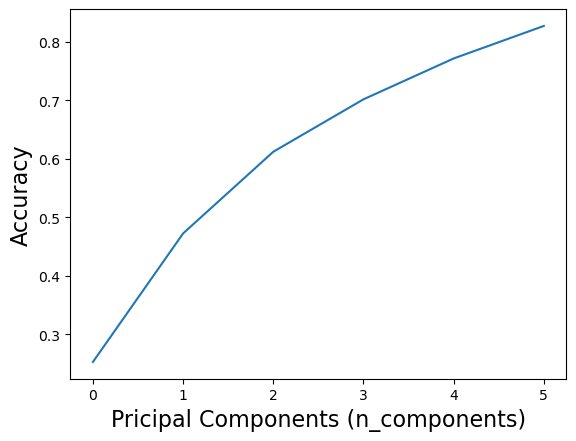

In [237]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Pricipal Components (n_components)",fontsize=16)
plt.ylabel("Accuracy",fontsize=16)

From the graph we can conclude that when principal component is around 5 or 6,accuracy is highest.
Therefore when we use n_compoments=6, we get highest accuracy rate 98.97%,when dimensionality is reduced from 13 to 6

***

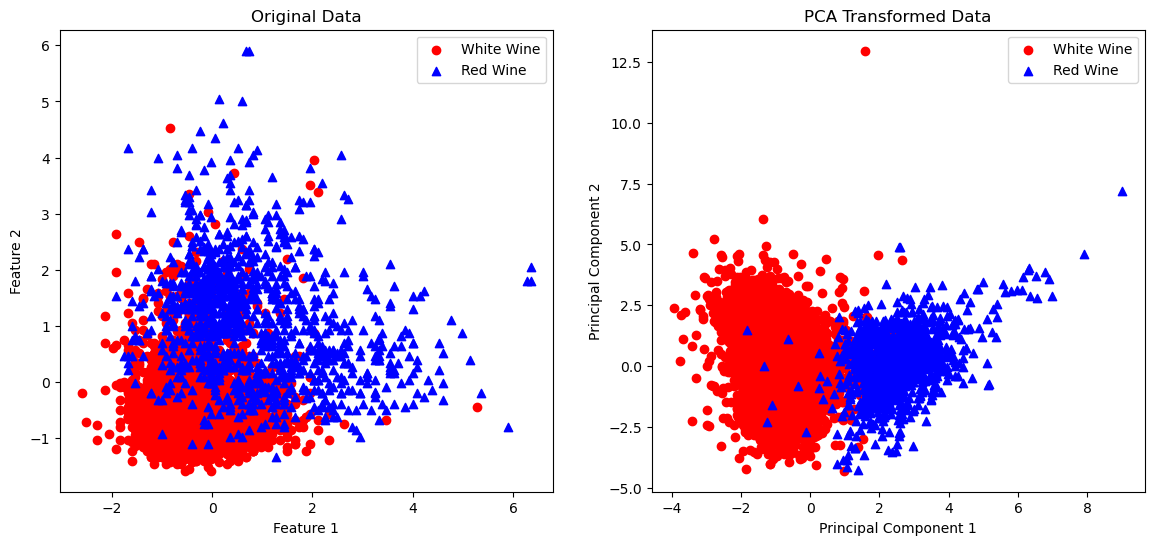

Accuracy before PCA: 0.99
Accuracy after PCA: 0.99


In [238]:
# Plot the results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train_scaled[y_train == 'white'][:, 0], X_train_scaled[y_train == 'white'][:, 1], 
            color='red', marker='o', label='White Wine')
plt.scatter(X_train_scaled[y_train == 'red'][:, 0], X_train_scaled[y_train == 'red'][:, 1], 
            color='blue', marker='^', label='Red Wine')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_train_pca[y_train == 'white'][:, 0], X_train_pca[y_train == 'white'][:, 1], 
            color='red', marker='o', label='White Wine')
plt.scatter(X_train_pca[y_train == 'red'][:, 0], X_train_pca[y_train == 'red'][:, 1], 
            color='blue', marker='^', label='Red Wine')
plt.title('PCA Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.show()



In [239]:
print(f'Accuracy before PCA: {accuracy_no_pca:.2f}')
print(f'Accuracy after PCA: {accuracy_pca:.2f}')

Accuracy before PCA: 0.99
Accuracy after PCA: 0.99


***

 # <span style='color:Blue'>  ***2. Linear Discriminant Analysis (LDA)*** </span>

- Linear discriminant analysis (LDA) is a dimensionality reduction technique in which the goal is to project a dataset into lower dimensional space. Linear discriminant analysis is also known as Normal Discriminant Analysis (NDA)
- 
Both Linear Discriminant Analysis (LDA) and Principal Component Analysis (PCA) are linear transformation techniques that are commonly used for dimensionality reductio
-  LDA is “supervised” and computes the directions (“linear discriminants”) that will represent the axes that that maximize the separation between multiple classes.
-  Unlike Principal Component Analysis (PCA), which focuses on maximizing the variance in the data, LDA aims to maximize the separability between different classes in a classification problem.




  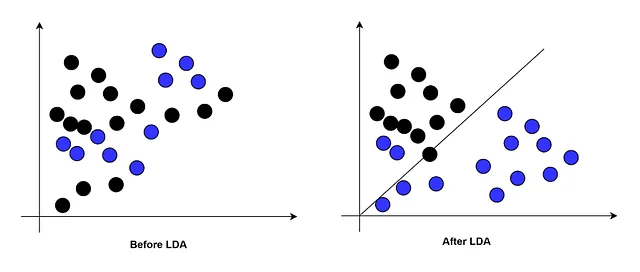n.

### ***Advantages Of LDA***

1. ***Effective for Classification:*** LDA is highly effective in improving the performance of classifiers since it focuses on maximizing class separability.

2. ***Utilizes Class Information:*** LDA leverages class labels, which can be crucial in many real-world applications.

3. ***Reduced Overfitting***: By reducing dimensionality while retaining class-related information, LDA can help prevent overfitting.

### ***When to Use LDA***:
1. Classification Tasks
LDA is beneficial when the goal is to classify data into predefined classes.

2. Preserving Class Information:
When the goal is to reduce dimensionality while preserving information that is relevant for discriminating between classes.

3. Normality Assumption Holds:
LDA performs well when the assumption of normal distribution within each class is valid.

4. Supervised Dimensionality Reduction:
When the task requires dimensionality reduction with the guidance of class labels, LDA is a suitable choice.

***

 # <span style='color:Blue'>  ***Implementing LDA*** </span>


In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)


In [206]:
# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=1)

X_train_lda = lda.fit_transform(X_train_scaled, y_train)

X_test_lda = lda.transform(X_test_scaled)



In [207]:
# Train logistic regression before LDA

LR = LogisticRegression()
LR.fit(X_train_scaled, y_train)

y_train_pred_before = LR.predict(X_train_scaled)
y_test_pred_before = LR.predict(X_test_scaled)

train_accuracy_before = accuracy_score(y_train, y_train_pred_before)
test_accuracy_before = accuracy_score(y_test, y_test_pred_before)



In [208]:
# Train logistic regression after LDA

LR.fit(X_train_lda, y_train)

y_train_pred_after = LR.predict(X_train_lda)
y_test_pred_after = LR.predict(X_test_lda)

train_accuracy_after = accuracy_score(y_train, y_train_pred_after)
test_accuracy_after = accuracy_score(y_test, y_test_pred_after)



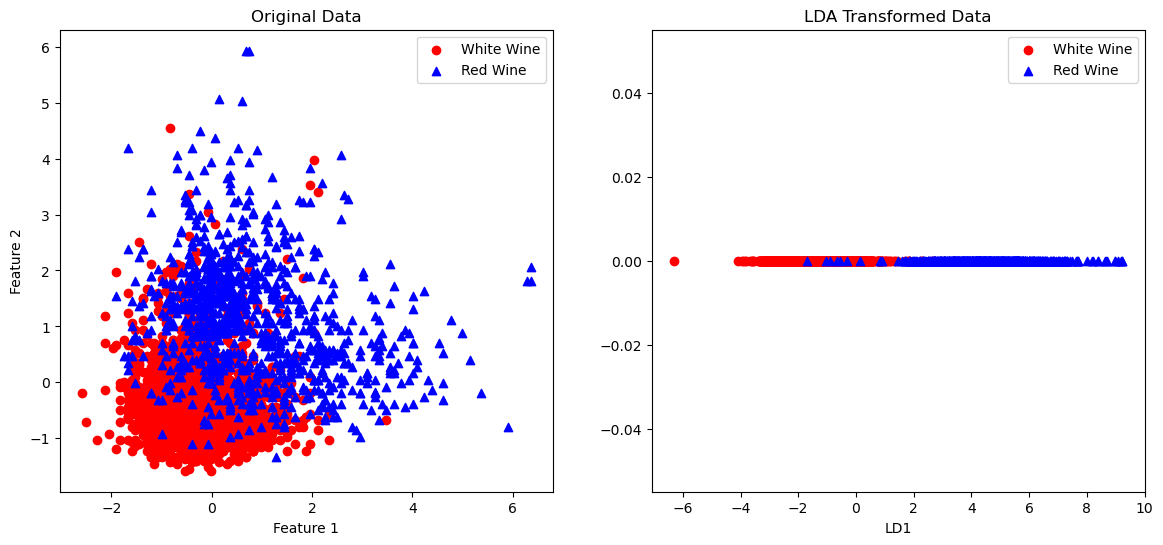

In [209]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train_scaled[y_train == 'white'][:, 0], X_train_scaled[y_train == 'white'][:, 1], 
            color='red', marker='o', label='White Wine')
plt.scatter(X_train_scaled[y_train == 'red'][:, 0], X_train_scaled[y_train == 'red'][:, 1], 
            color='blue', marker='^', label='Red Wine')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_train_lda[y_train == 'white'], np.zeros_like(X_train_lda[y_train == 'white']), 
            color='red', marker='o', label='White Wine')
plt.scatter(X_train_lda[y_train == 'red'], np.zeros_like(X_train_lda[y_train == 'red']), 
            color='blue', marker='^', label='Red Wine')
plt.title('LDA Transformed Data')
plt.xlabel('LD1')
plt.legend()

plt.show()



In [210]:
print(f'Accuracy before LDA - Training: {train_accuracy_before:.2f}, Test: {test_accuracy_before:.2f}')
print(f'Accuracy after LDA - Training: {train_accuracy_after:.2f}, Test: {test_accuracy_after:.2f}')

Accuracy before LDA - Training: 0.99, Test: 0.99
Accuracy after LDA - Training: 0.99, Test: 0.99


***

 # <span style='color:Blue'>  ***3. t-Distributed Stochastic Neighbor Embedding (t-SNE)*** </span>

### ***What is t-SNE?***
t-SNE is a nonlinear dimensionality reduction technique that excels in preserving the structure of the dataUnlike linear techniques such as PCA, t-SNE focuses on mapping data points to a lower-dimensional space while preserving pairwise similarities.

### ***How Does t-SNE Work?***
t-SNE minimizes the divergence between two probability distributions: a distribution that measures pairwise similarities of the data points and a distribution in the lower-dimensional space. It constructs these distributions iteratively, making the data points in the low-dimensional space match their high-dimensional counterparts as closely as possible..

### ***Advantages***
Visualization: t-SNE can help visualize high-dimensional data that has non-linear relationships as well as outliers
Good for clustering: t-SNE is often used for clustering and can help identify groups of similar data points within the data.

### ***Limitations***
Computational Complexity: t-SNE involves complex calculations as it calculates the pairwise conditional probability for each point. Due to this, it takes more time as the number of data points increases. Barnes-Hut t-SNE was later developed to improve on this.
Non-Deterministic: Due to the randomness in the algorithm, even though code and data points are the same in each iteration, we may get different results across runs.

In [241]:
# Train a K-Nearest Neighbors (KNN) classifier without t-SNE
knn_no_tsne = KNeighborsClassifier(n_neighbors=5)
knn_no_tsne.fit(X_train_scaled, y_train)



KNeighborsClassifier()

In [242]:
# Predict the wine type on the testing set without t-SNE
y_pred_no_tsne = knn_no_tsne.predict(X_test_scaled)
accuracy_no_tsne = accuracy_score(y_test, y_pred_no_tsne)



In [243]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_test_tsne = tsne.fit_transform(X_test_scaled)



In [244]:
# Train a K-Nearest Neighbors (KNN) classifier with t-SNE
knn_with_tsne = KNeighborsClassifier(n_neighbors=5)
knn_with_tsne.fit(X_train_tsne, y_train)



KNeighborsClassifier()

In [245]:
# Predict the wine type on the testing set with t-SNE
y_pred_tsne = knn_with_tsne.predict(X_test_tsne)
accuracy_tsne = accuracy_score(y_test, y_pred_tsne)



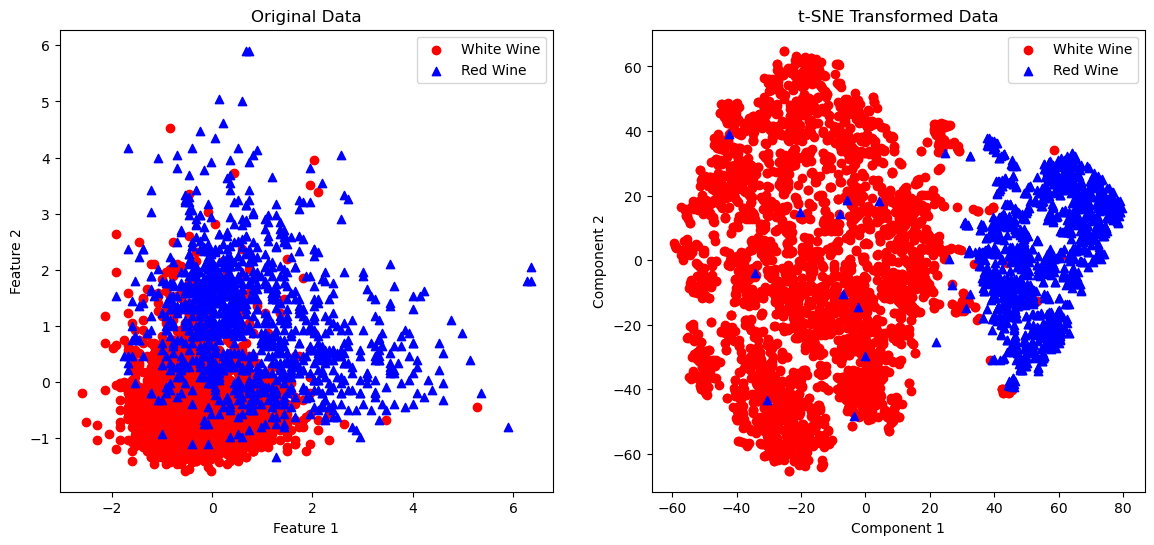

In [248]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train_scaled[y_train == 'white'][:, 0], X_train_scaled[y_train == 'white'][:, 1], 
            color='red', marker='o', label='White Wine')
plt.scatter(X_train_scaled[y_train == 'red'][:, 0], X_train_scaled[y_train == 'red'][:, 1], 
            color='blue', marker='^', label='Red Wine')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_train_tsne[y_train == 'white'][:, 0], X_train_tsne[y_train == 'white'][:, 1], 
            color='red', marker='o', label='White Wine')
plt.scatter(X_train_tsne[y_train == 'red'][:, 0], X_train_tsne[y_train == 'red'][:, 1], 
            color='blue', marker='^', label='Red Wine')
plt.title('t-SNE Transformed Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()

plt.show()



In [250]:
print(f'Accuracy before t-SNE: {accuracy_no_tsne:.2f}')
print(f'Accuracy after t-SNE: {accuracy_tsne:.2f}')

Accuracy before t-SNE: 0.99
Accuracy after t-SNE: 0.69


***